<a href="https://colab.research.google.com/github/AstridSerruto/Projects/blob/master/Predictions/Predict_sp500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
!pip install yfinance

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
#Call Yahoo Api to download daily stock and index prices.
import yfinance as yf

In [76]:
#Initialize ticker class to download price history for a single symbol
sp500 = yf.Ticker('^GSPC')

In [77]:
#Query historical prices using history method
sp500 = sp500.history(period='max')

sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2022-05-27,4077.429932,4158.490234,4077.429932,4158.240234,3560560000,0,0
2022-05-31,4151.089844,4168.339844,4104.879883,4132.149902,5192220000,0,0
2022-06-01,4149.779785,4166.540039,4073.850098,4101.229980,4145710000,0,0


In [78]:
sp500.index

DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',
               '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12',
               '1950-01-13', '1950-01-16',
               ...
               '2022-05-20', '2022-05-23', '2022-05-24', '2022-05-25',
               '2022-05-26', '2022-05-27', '2022-05-31', '2022-06-01',
               '2022-06-02', '2022-06-03'],
              dtype='datetime64[ns]', name='Date', length=18224, freq=None)

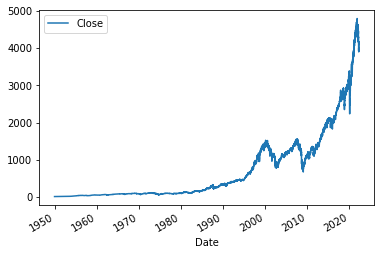

In [79]:
#plot the DataFrame, closing price against index
sp500.plot.line(y='Close', use_index=True)

In [80]:
#Remove unnecessary columns
del sp500['Dividends']
del sp500['Stock Splits']

In [81]:
#Set up target, what we will predit using Machine Learning.
#Will the price go up or down tomorrow?
#On the days the price goes up, can we predict is actually goes up?
#Create new column 'Tomorrow' for tomorrow's price
sp500['Tomorrow'] = sp500['Close'].shift(-1)

sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001
...,...,...,...,...,...,...
2022-05-27,4077.429932,4158.490234,4077.429932,4158.240234,3560560000,4132.149902
2022-05-31,4151.089844,4168.339844,4104.879883,4132.149902,5192220000,4101.229980
2022-06-01,4149.779785,4166.540039,4073.850098,4101.229980,4145710000,4176.819824


In [82]:
#Set target based on tomorrow's price
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int)

sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2022-05-27,4077.429932,4158.490234,4077.429932,4158.240234,3560560000,4132.149902,0
2022-05-31,4151.089844,4168.339844,4104.879883,4132.149902,5192220000,4101.229980,0
2022-06-01,4149.779785,4166.540039,4073.850098,4101.229980,4145710000,4176.819824,1


In [83]:
#Removing data before 1990. Through time the market can shift fundamentally 
#and historical data might not be useful for future predictions.
sp500 = sp500.loc['1990-01-01':].copy()

sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-05-27,4077.429932,4158.490234,4077.429932,4158.240234,3560560000,4132.149902,0
2022-05-31,4151.089844,4168.339844,4104.879883,4132.149902,5192220000,4101.229980,0
2022-06-01,4149.779785,4166.540039,4073.850098,4101.229980,4145710000,4176.819824,1


In [84]:
#Train first model. Using Random Forest Classifier, it can pick up nonlinear relationships
from sklearn.ensemble import RandomForestClassifier

In [85]:
#Initialize baseline model 
#n_estimators, individual number of trees we want to train, higher number more accurate.
#min_smaple_split, helps protect from over fitting, higher number less accurate.
#random_state, if we run the same model again the random number generated will be in a predictable sequence. 
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

#Split data train/test. Last 100 rows for testing.
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

#Create list with all columns used to predict target.
predictors = ['Close', 'Volume', 'Open', 'High', 'Low']
#Fit the model and try to predict the target
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [86]:
#Measure how accurate the model is. What percent of the time we said the market
#would go up, did it actually go up.
import pandas as pd
from sklearn.metrics import precision_score

In [87]:
#predict model with test set and use predictors
preds = model.predict(test[predictors])

#Convert to pandas series
preds = pd.Series(preds, index=test.index)

preds

Date
2022-01-11    0
2022-01-12    0
2022-01-13    0
2022-01-14    1
2022-01-18    1
             ..
2022-05-27    0
2022-05-31    1
2022-06-01    1
2022-06-02    0
2022-06-03    1
Length: 100, dtype: int64

In [88]:
#Calculate the precision score using the actual target and predicted target.
precision_score(test['Target'], preds)

0.43023255813953487

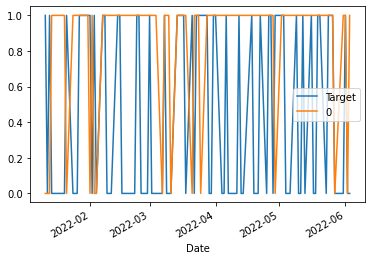

In [89]:
#Time to improve the model. 45% accuracy is very low.
#Plot predictions by combining predicted and actual values
combined = pd.concat([test['Target'], preds], axis=1)

combined.plot()
#Orange line = 0, are our predictions, Blue line = 1, what happened.
#We mostly predicted the market would go up, but it mostly went down.

In [90]:
#Building a better way to test the algorithm.
#We will back test, create the function.
def predict(train, test, predictors, model):
  model.fit(train[predictors], train['Target'])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test['Target'], preds], axis=1)
  return combined

In [91]:
#Backtest function
def backtest(data, model, predictors, start=2500, step=250):
  all_predictions = []

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

In [92]:
#Backtest with model and predictors
predictions = backtest(sp500, model, predictors)

In [93]:
predictions['Predictions'].value_counts()

0    3324
1    2346
Name: Predictions, dtype: int64

In [94]:
#Checking prediction score again
precision_score(predictions['Target'], predictions['Predictions'])

0.5353793691389599

In [95]:
#53% of the predictions were accurate.
#Check number of days the market went up
predictions['Target'].value_counts() / predictions.shape[0]

1    0.536861
0    0.463139
Name: Target, dtype: float64

In [96]:
#Create variaty of rolling averages. Calculate rolling averages of the last 2 days, 
#the last week, the last 3 months, the last year, and the last 4 years. Find ratio between the periods.
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
  rolling_averages = sp500.rolling(horizon).mean()

  ratio_column = f'Close_Ratio_ {horizon}'
  sp500[ratio_column] = sp500['Close'] / rolling_averages['Close']

  trend_column = f'Trend_{horizon}'
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()['Target']

  new_predictors += [ratio_column, trend_column]

sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_ 2,Trend_2,Close_Ratio_ 5,Trend_5,Close_Ratio_ 60,Trend_60,Close_Ratio_ 250,Trend_250,Close_Ratio_ 1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,4077.429932,4158.490234,4077.429932,4158.240234,3560560000,4132.149902,0,1.012220,2.0,1.033872,4.0,0.972748,29.0,0.938525,132.0,1.201344,553.0
2022-05-31,4151.089844,4168.339844,4104.879883,4132.149902,5192220000,4101.229980,0,0.996853,1.0,1.019356,3.0,0.967387,29.0,0.932687,132.0,1.193341,552.0
2022-06-01,4149.779785,4166.540039,4073.850098,4101.229980,4145710000,4176.819824,1,0.996245,0.0,1.003816,3.0,0.960522,29.0,0.925815,131.0,1.183962,551.0


In [97]:
#Drop missing rows
sp500 = sp500.dropna()

sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_ 2,Trend_2,Close_Ratio_ 5,Trend_5,Close_Ratio_ 60,Trend_60,Close_Ratio_ 250,Trend_250,Close_Ratio_ 1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-26,3984.600098,4075.139893,3984.600098,4057.840088,3961940000,4158.240234,1,1.009844,2.0,1.021963,4.0,0.948502,28.0,0.915823,132.0,1.172805,553.0
2022-05-27,4077.429932,4158.490234,4077.429932,4158.240234,3560560000,4132.149902,0,1.012220,2.0,1.033872,4.0,0.972748,29.0,0.938525,132.0,1.201344,553.0
2022-05-31,4151.089844,4168.339844,4104.879883,4132.149902,5192220000,4101.229980,0,0.996853,1.0,1.019356,3.0,0.967387,29.0,0.932687,132.0,1.193341,552.0


In [98]:
from pandas.core.common import random_state
#Update model and change parameters.
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [99]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train['Target'])
  preds = model.predict_proba(test[predictors])[:,1]
  preds[preds >= .6] =1
  preds[preds < .6] =0
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test['Target'], preds], axis=1)
  return combined

In [ ]:
predictions = backtest(sp500, model, new_predictors)

In [ ]:
predictions['Predictions'].value_counts()

In [ ]:
precision_score(predictions['Target'], predictions['Predictions'])

We did the following:

We downloaded the data.

Cleaned the data.

Set up our Machine learning Target

We trained our initial model

We evaluate error and created a way to backtest. Accurately measure 
the error over long period of time.

Improved model with extra predictor columns

To improve the model:

Check the markets in other parts of the world. Many markets open before the US market. Do those markets help predict the sp500 better?

Could add some key components like stocks. If a tech stock goes down, does the sp500 goe down 6 months from now?

Increase resolution, maybe hourly.